In [53]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

c:\Users\USUARIO\Desktop\GITHUB Projects\video_games_sales\notebooks
c:\Users\USUARIO\Desktop\GITHUB Projects\video_games_sales


# Reading CSV file as pandas dataframe

In [7]:
data_root="./data"
df= pd.read_csv(data_root+"/preprocessed/vg_sales_clean.csv",engine="python")

In [12]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

# Frequencies Analysis
Por compañia, genero, año

## Num Games by Year

<Axes: title={'center': 'Games Releases by Year'}, xlabel='Year_of_Release', ylabel='Platform'>

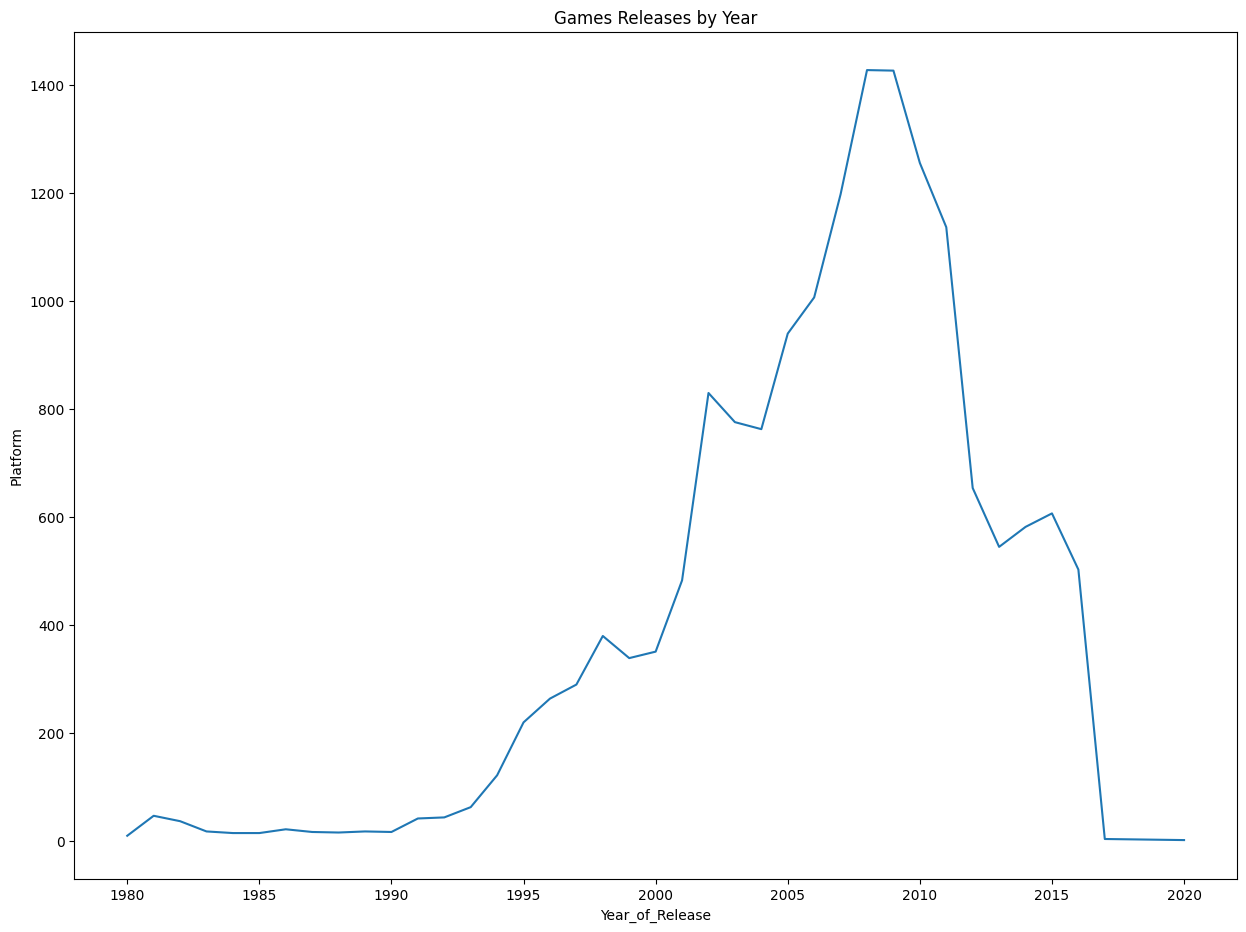

In [51]:
plot_dims=(15, 11)
fig, ax = plt.subplots(figsize=plot_dims)

plt.title('Games Releases by Year')
df.groupby('Year_of_Release').agg({"Platform":"count"}).reset_index().pipe((sns.lineplot, "data"), x="Year_of_Release", y="Platform")

## Participation on sales by Year

<Axes: title={'center': 'Participation on sales by Year'}, xlabel='Year_of_Release', ylabel='Global_Sales'>

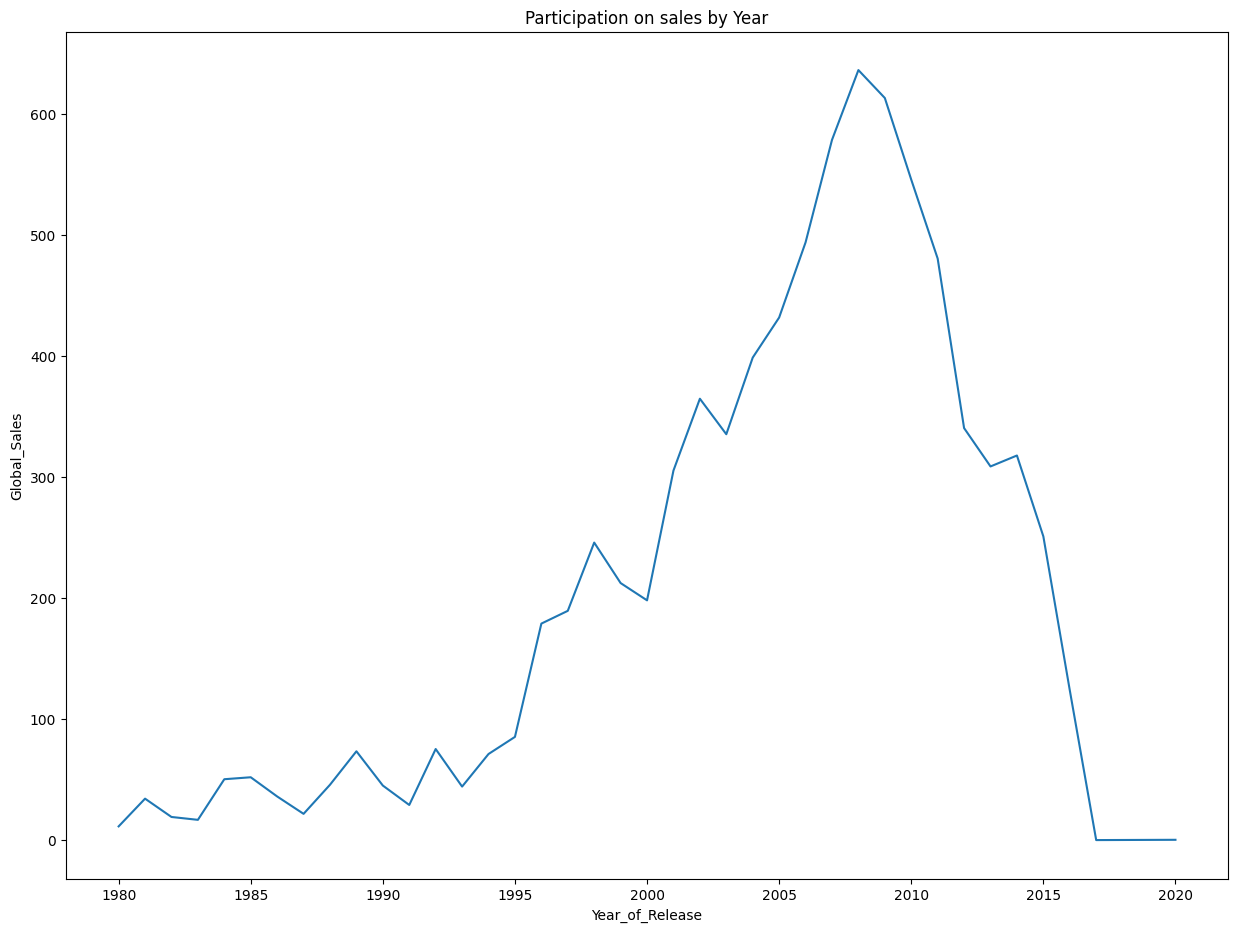

In [46]:
plot_dims=(15, 11)
fig, ax = plt.subplots(figsize=plot_dims)

plt.title('Participation on sales by Year')
df.groupby('Year_of_Release').agg({"Global_Sales":"sum"}).reset_index().pipe((sns.lineplot, "data"), x="Year_of_Release", y="Global_Sales")


## Participation on sales by Genre

<Axes: title={'center': 'Participation on sales by Genre'}, xlabel='Genre', ylabel='Global_Sales'>

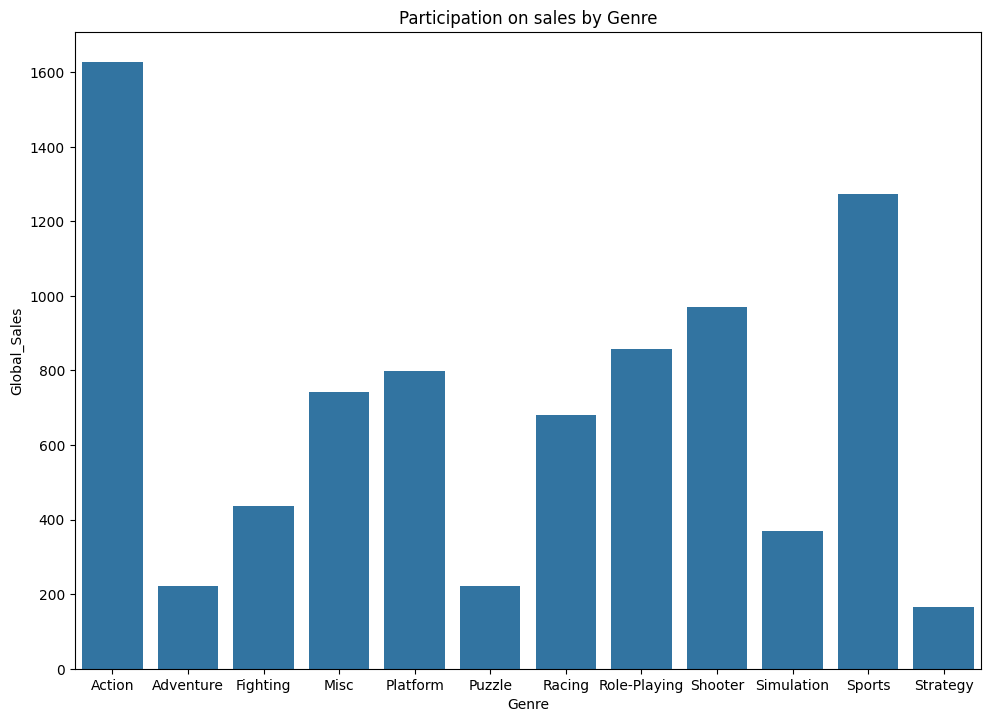

In [33]:
plot_dims=(11.7, 8.27)
fig, ax = plt.subplots(figsize=plot_dims)
plt.title('Participation on sales by Genre')
df.groupby('Genre').agg({"Global_Sales":"sum"}).reset_index().pipe((sns.barplot, "data"), x="Genre", y="Global_Sales")

## Participation on sales by Platform

<Axes: title={'center': 'Participation on sales by Platform'}, xlabel='Platform', ylabel='Global_Sales'>

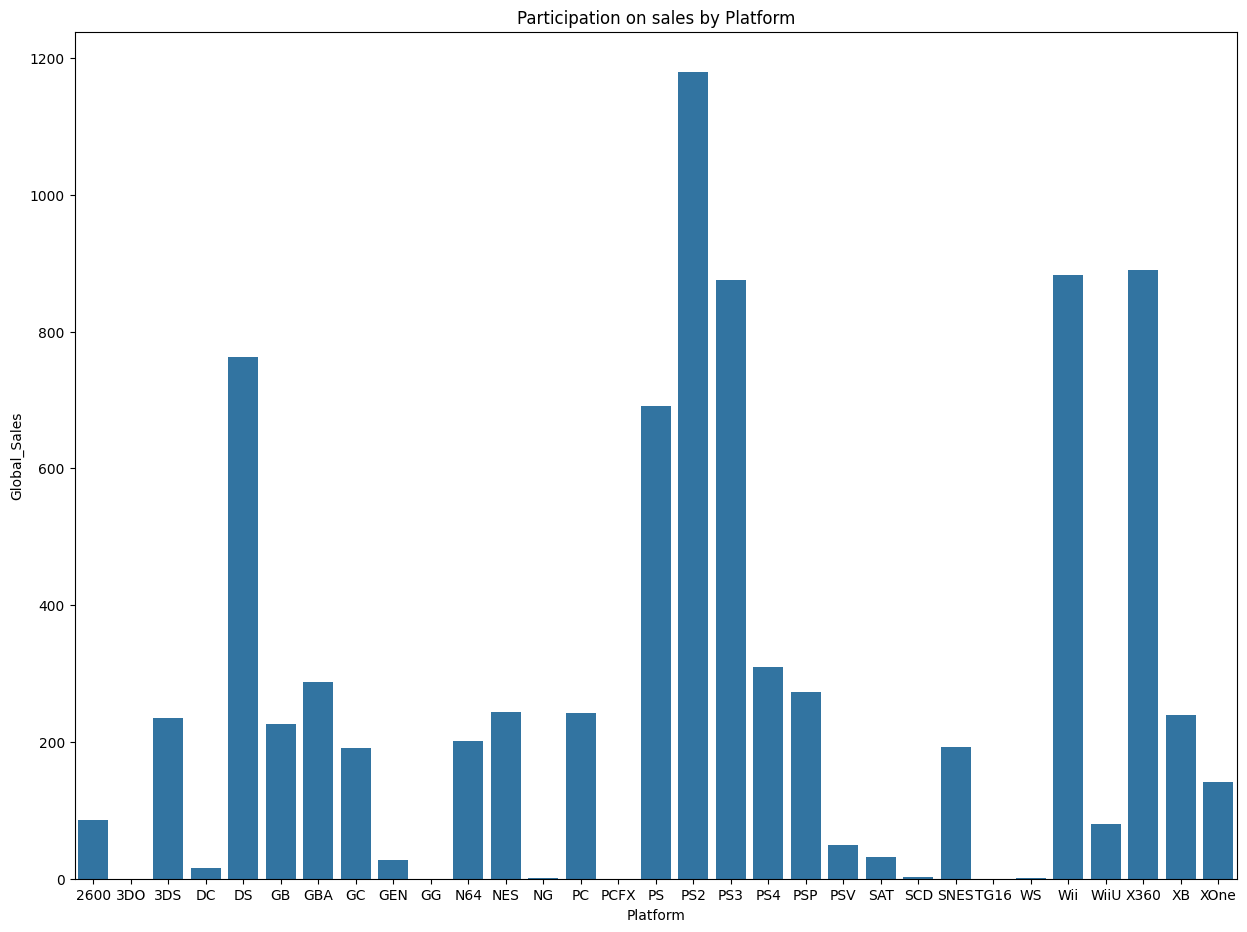

In [36]:
plot_dims=(15, 11)
fig, ax = plt.subplots(figsize=plot_dims)
plt.title('Participation on sales by Platform')
df.groupby('Platform').agg({"Global_Sales":"sum"}).reset_index().pipe((sns.barplot, "data"), x="Platform", y="Global_Sales")

## Participation on User Count by Platform

<Axes: title={'center': 'Participation on User Count by Platform'}, xlabel='Platform', ylabel='User_Count'>

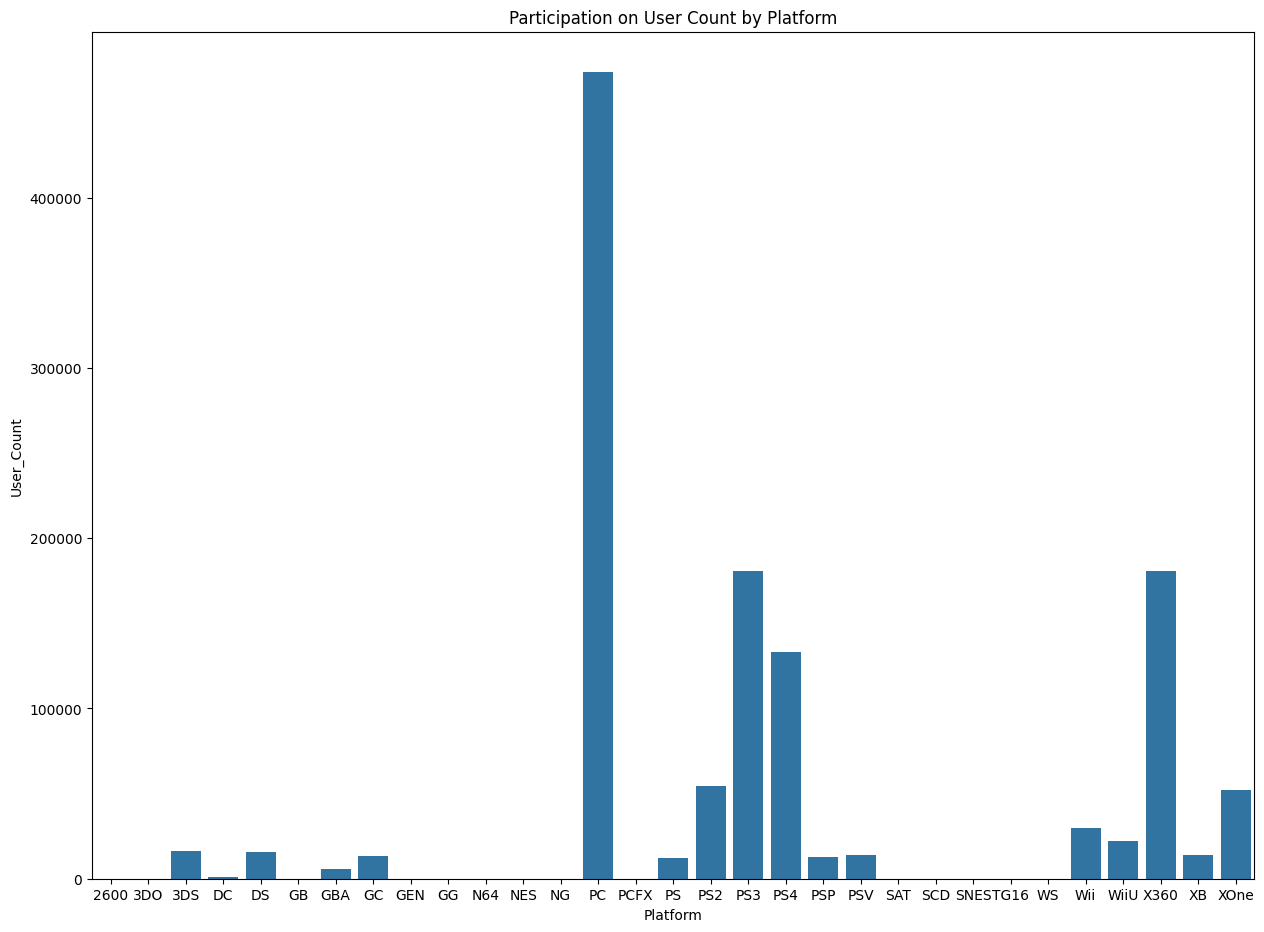

In [44]:
plot_dims=(15, 11)
fig, ax = plt.subplots(figsize=plot_dims)
plt.title('Participation on User Count by Platform')
df.groupby('Platform').agg({"User_Count":"sum"}).reset_index().pipe((sns.barplot, "data"), x="Platform", y="User_Count")

# Analisis series de tiempo

In [60]:
df[["Year_of_Release","Global_Sales"]]

,Year_of_Release,Global_Sales
0,2006.0,82.53
1,1985.0,40.24
2,2008.0,35.52
3,2009.0,32.77
4,1996.0,31.37
...,...,...
16714,2016.0,0.01
16715,2006.0,0.01
16716,2016.0,0.01
16717,2003.0,0.01


<Axes: title={'center': 'Participation on sales by Year'}, xlabel='Year_of_Release', ylabel='Global_Sales'>

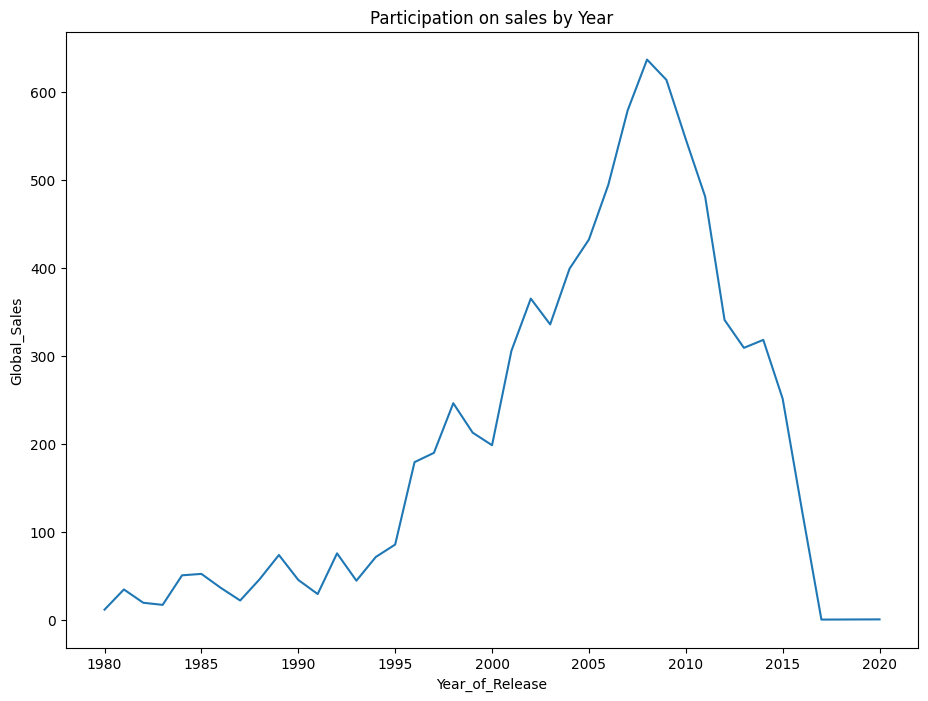

In [64]:
plot_dims=(11, 8)
fig, ax = plt.subplots(figsize=plot_dims)

plt.title('Participation on sales by Year')
df.groupby('Year_of_Release').agg({"Global_Sales":"sum"}).reset_index().pipe((sns.lineplot, "data"), x="Year_of_Release", y="Global_Sales")

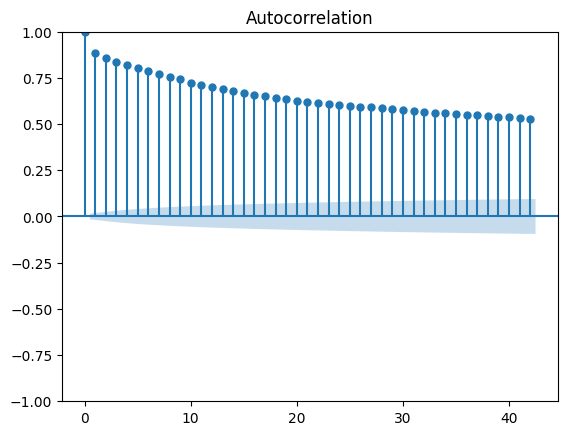

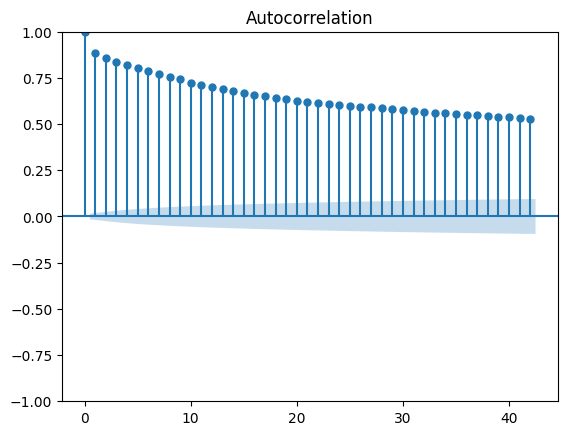

In [67]:
plot_acf(df["Global_Sales"].dropna())

## making the analysis by platform

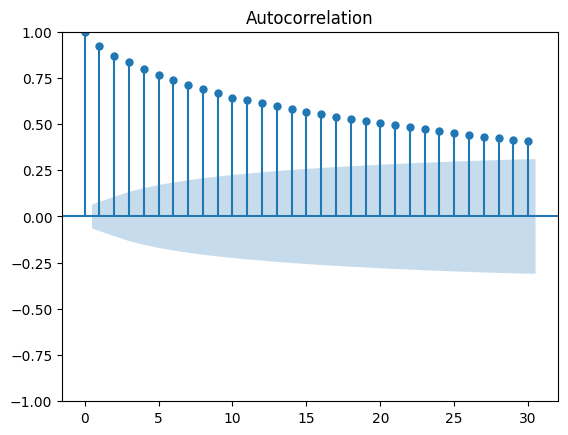

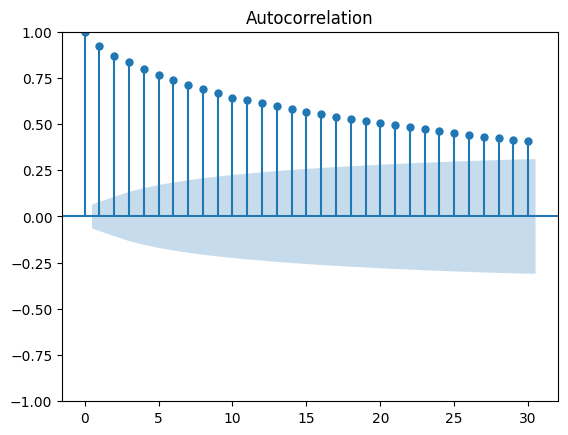

In [68]:
plot_acf(df[df["Platform"]=="PC"]["Global_Sales"].dropna())

# Analisis de User Count